<a href="https://colab.research.google.com/github/leynessa/ds_projects/blob/main/binary_class_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer dataset

In this project we are going use 2 of the more popular binary classification- decision tree and naive bayes- to predict if a tumor is benign or malignant

what is a binary classification?
binary classification is a supervised learning algorithm that categorizes new observations into one of two classes.



objective of the project: predict is if the tumor is malignant or not
the data set can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

##About the dataset

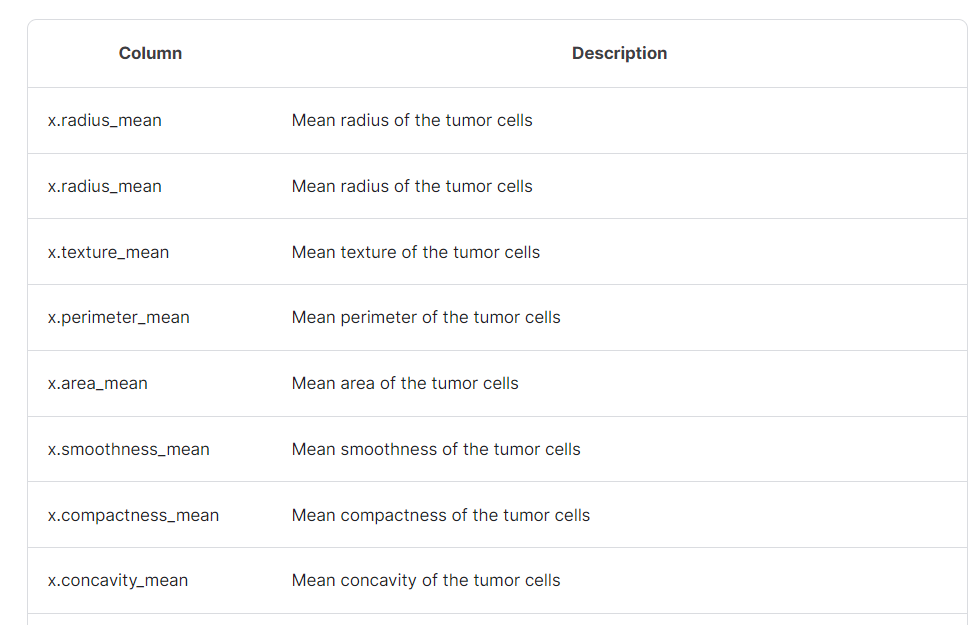

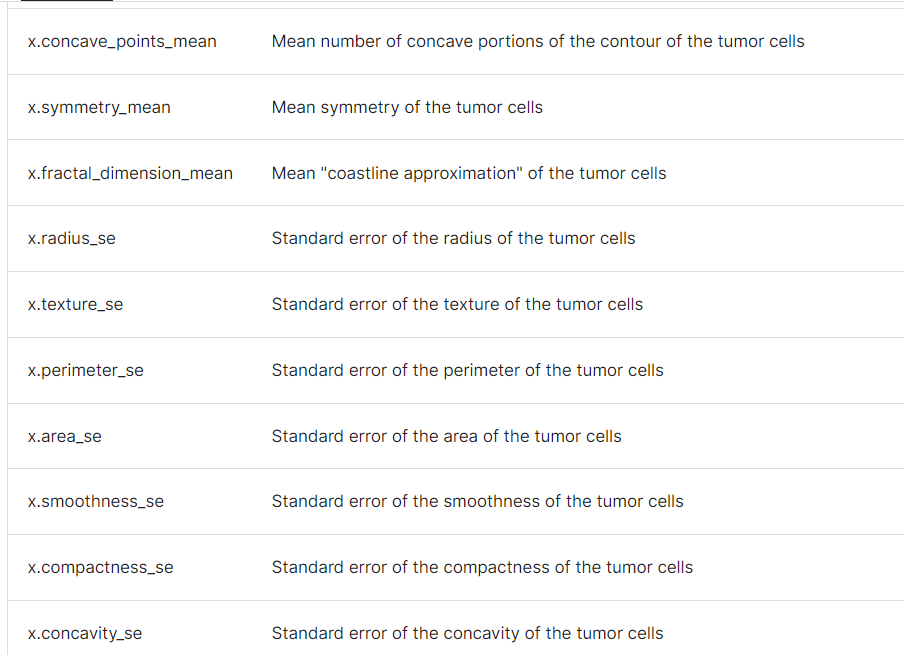
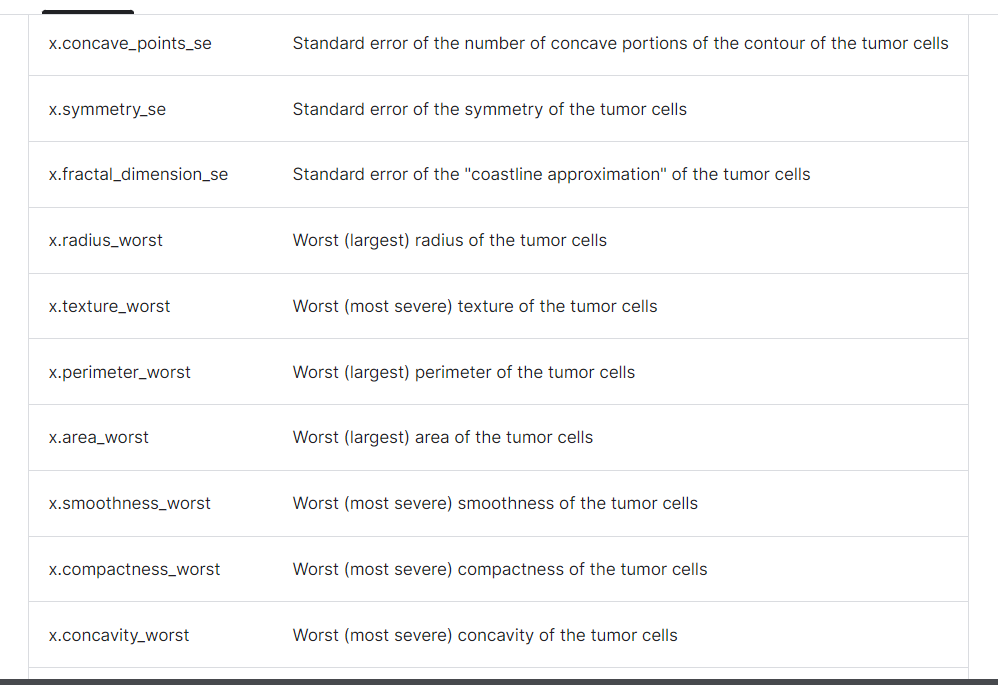
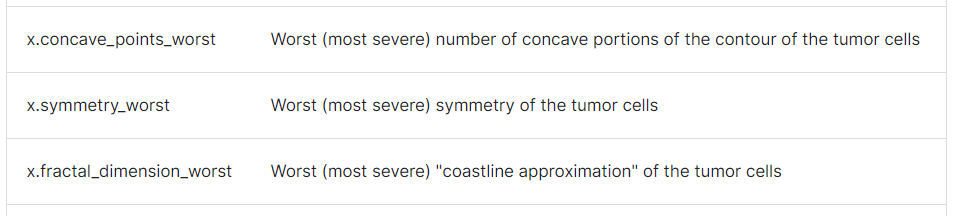

In [146]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [147]:
#import data
df = pd.read_csv("breastcancer_dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

based on the info there no missing values except the "unnamed : 32 "column has nan values. so i will drop that column below

<Axes: >

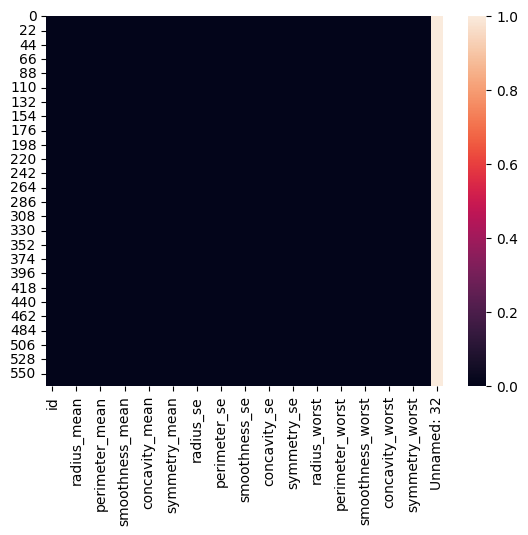

In [149]:
sns.heatmap(df.isnull()) #check missing values.

In [150]:
list(df.columns)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [151]:
df['diagnosis']. nunique()


2

In [152]:
diagnosisColumnDummy = pd.get_dummies(df['diagnosis']) #get dummies encodes categorical variable to 1 or 0

In [153]:
df = pd.concat((df, diagnosisColumnDummy), axis=1)

In [154]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,B,M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0,1


In [155]:
#remember to drop the redundant columns
df = df.drop(['diagnosis', 'B', 'Unnamed: 32'], axis = 1) #delete B to prevent collinearity

In [178]:
df.head(20)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0
5,0.000916,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,...,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939,1.0
6,0.000917,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,...,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853,1.0
7,0.092668,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,...,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939,1.0
8,0.000918,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,...,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123,1.0
9,0.092715,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,...,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000,1.0


based on the table you can see that in column M . 1= malignant and 0= begnin

In [179]:
#normalize
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Normalization using MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(df)
df= pd.DataFrame(normalized_data, columns=df.columns)

In [180]:
X = df.values
y = df['M'].values

In [181]:
# to see the endex of M
df.shape

index_no = df.columns.get_loc("M")
index_no

31

In [182]:
#delete the diagnosis column from X
X=np.delete(X,31,axis=1)

In [183]:
X

array([[9.14760426e-04, 5.21037437e-01, 2.26580994e-02, ...,
        9.12027491e-01, 5.98462448e-01, 4.18863964e-01],
       [9.14996350e-04, 6.43144493e-01, 2.72573554e-01, ...,
        6.39175258e-01, 2.33589592e-01, 2.22878132e-01],
       [9.24954884e-02, 6.01495575e-01, 3.90260399e-01, ...,
        8.35051546e-01, 4.03705894e-01, 2.13433032e-01],
       ...,
       [1.00765069e-03, 4.55251077e-01, 6.21237741e-01, ...,
        4.87285223e-01, 1.28720678e-01, 1.51908697e-01],
       [1.00796562e-03, 6.44564343e-01, 6.63510315e-01, ...,
        9.10652921e-01, 4.97141731e-01, 4.52315361e-01],
       [9.22636984e-05, 3.68687586e-02, 5.01521813e-01, ...,
        0.00000000e+00, 2.57441356e-01, 1.00682146e-01]])

In [184]:
y #feature

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [94]:
#split the data

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [205]:
#decison tree model
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5) #The max_depth parameter is used to limit the depth of the decision tree to avoid overfitting.
dt_clf.fit(X_train, y_train) #Train the decision tree classifier using the training data X_train and y_train using the fit() method.
accuracy = dt_clf.score(X_test, y_test)#Evaluate the classifier's accuracy on the test set using the score() method. The accuracy is then stored in the variable accuracy.
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [204]:
## choose the correct max depth on the decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, y_train are the training data and labels
# Define the parameter grid with max depth values to search through
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier()
param_grid ={  'max_depth': [None, 5, 10, 20, 30, 40, 50] }
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Get the best max depth from the search results
best_max_depth = grid_search.best_params_['max_depth']
print("Best Max Depth:", best_max_depth)

Best Max Depth: 5


In [165]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[64  3]
 [ 3 44]]


In [206]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_clf.score(X_test, y_test)

0.9122807017543859

## Conclusions
the decision tree model was better at predicting the outcome than naive bayes model
